In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
df = pd.read_csv('automobile.csv')
%matplotlib inline 

In [3]:
df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [8]:
def ames_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

ames_eda(df)

,null_sum,null_pct,dtypes,count,mean,median,min,max
aspiration,0,0.000000,object,201,NaN,NaN,std,turbo
body-style,0,0.000000,object,201,NaN,NaN,convertible,wagon
bore,0,0.000000,float64,201,3.330692,3.310000,2.54,3.94
city-L/100km,0,0.000000,float64,201,9.944145,9.791667,4.79592,18.0769
city-mpg,0,0.000000,int64,201,25.179104,24.000000,13,49
compression-ratio,0,0.000000,float64,201,10.164279,9.000000,7,23
curb-weight,0,0.000000,int64,201,2555.666667,2414.000000,1488,4066
diesel,0,0.000000,int64,201,0.099502,0.000000,0,1
drive-wheels,0,0.000000,object,201,NaN,NaN,4wd,rwd
engine-location,0,0.000000,object,201,NaN,NaN,front,rear


In [9]:
df.dtypes.value_counts()

float64    11
object     10
int64       8
dtype: int64

In [10]:
df.columns = [i.replace('-', '_').lower() for i in df.columns]

In [11]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_l/100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [12]:
df['num_of_doors'].value_counts()

four    115
two      86
Name: num_of_doors, dtype: int64

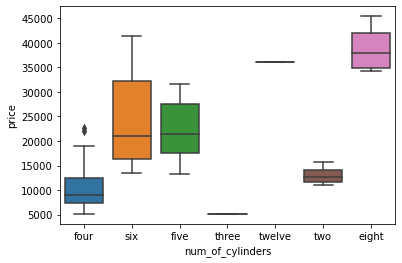

In [13]:
sns.boxplot(x='num_of_cylinders',y='price',data=df)

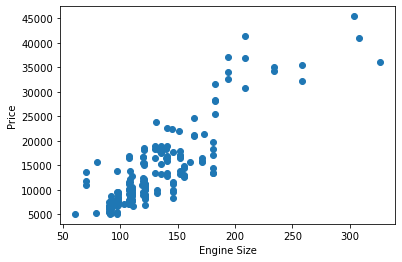

In [14]:
plt.scatter(df['engine_size'],df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

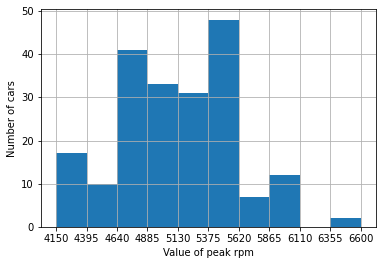

In [15]:
count,bin_edges = np.histogram(df['peak_rpm'])
df['peak_rpm'].plot(kind='hist',xticks=bin_edges)
plt.xlabel('Value of peak rpm')
plt.ylabel('Number of cars')
plt.grid()
plt.show()

In [22]:
df_temp = df[['num_of_doors','body_style','price']]
df_group= df_temp.groupby(['num_of_doors','body_style'], as_index=False).mean()

In [26]:
df_temp.head(10)

,num_of_doors,body_style,price
0,two,convertible,13495.0
1,two,convertible,16500.0
2,two,hatchback,16500.0
3,four,sedan,13950.0
4,four,sedan,17450.0
5,two,sedan,15250.0
6,four,sedan,17710.0
7,four,wagon,18920.0
8,four,sedan,23875.0
9,two,sedan,16430.0


In [27]:
df_group.head(10)

,num_of_doors,body_style,price
0,four,hatchback,8372.000000
1,four,sedan,14490.687500
2,four,wagon,12371.960000
3,two,convertible,21890.500000
4,two,hardtop,22208.500000
5,two,hatchback,10230.793103
6,two,sedan,14283.000000


In [28]:
df_pivot = df_group.pivot(index='body_style',columns='num_of_doors')


In [30]:
df_pivot.head()

price              
num_of_doors        four           two
body_style                            
convertible          NaN  21890.500000
hardtop              NaN  22208.500000
hatchback      8372.0000  10230.793103
sedan         14490.6875  14283.000000
wagon         12371.9600           NaN

In [33]:
df.isnull()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_l/100km,horsepower_binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


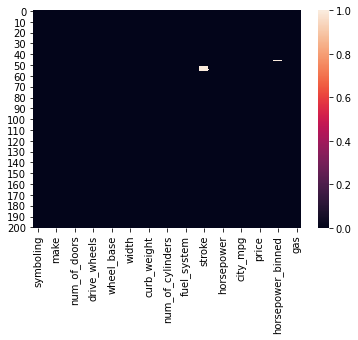

In [34]:
sns.heatmap(df.isnull())
plt.show()

In [35]:
temp_df = df[['make','price']].groupby(['make'])
stats.f_oneway(temp_df.get_group('audi')['price'],temp_df.get_group('volvo')['price'])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

In [36]:
stats.f_oneway(temp_df.get_group('jaguar')['price'],temp_df.get_group('honda')['price'])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

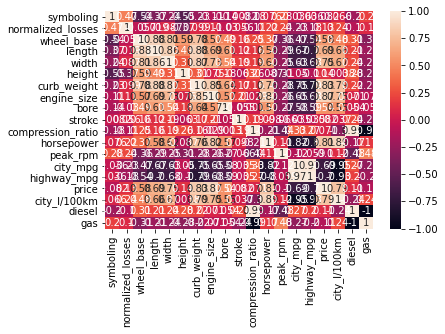

In [37]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

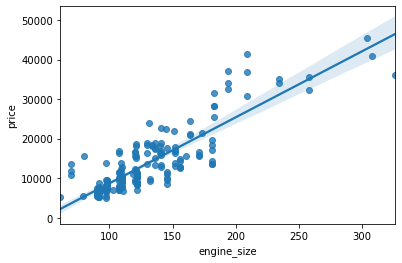

In [39]:
sns.regplot(x='engine_size',y='price',data=df)

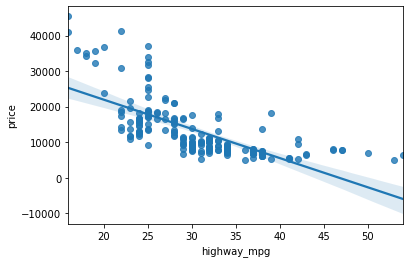

In [40]:
sns.regplot(x='highway_mpg',y='price',data=df)